Import module

In [174]:
%matplotlib inline 

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import torch as tc

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

Import datasheet

In [175]:
titanic = pd.read_csv("./datasheets/train.csv")
titanic.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Data analysis

In [176]:
print("Number of lines : {}".format(titanic.shape[0]))
print(titanic.dtypes)
titanic.describe()

Number of lines : 891
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


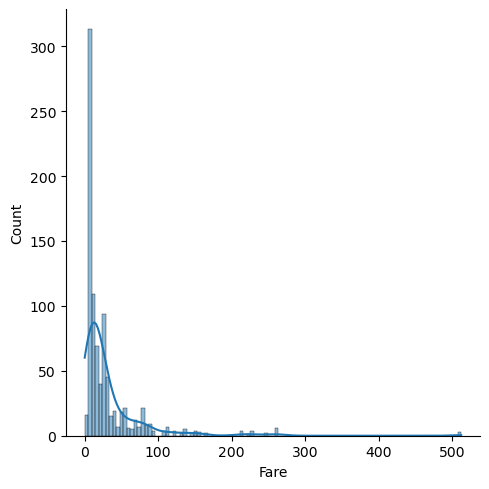

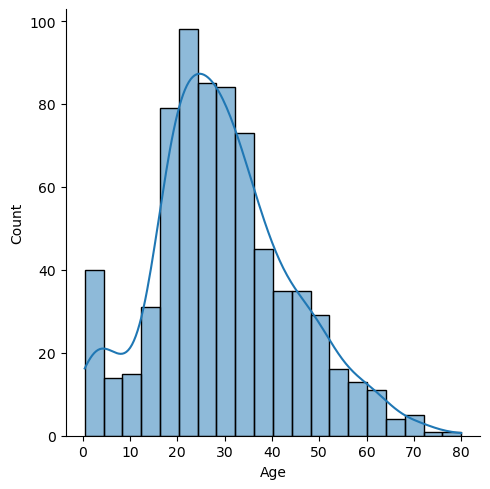

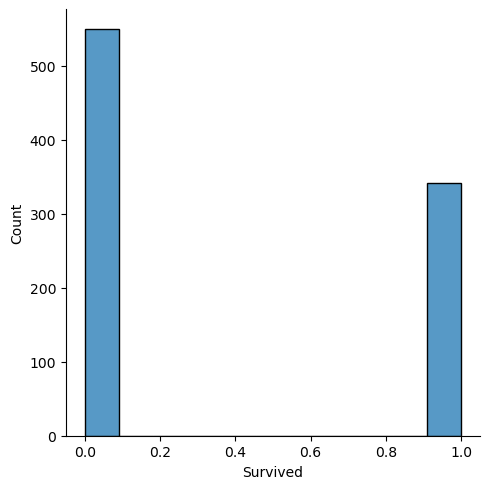

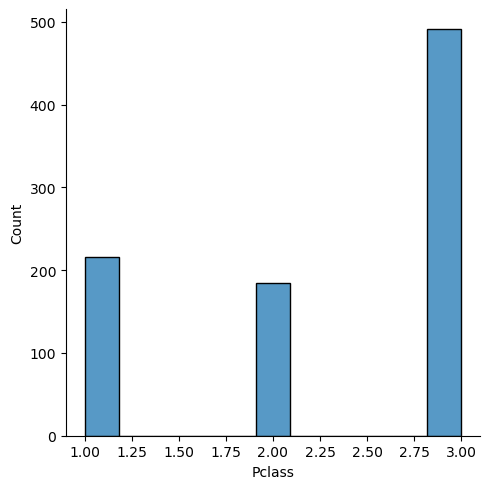

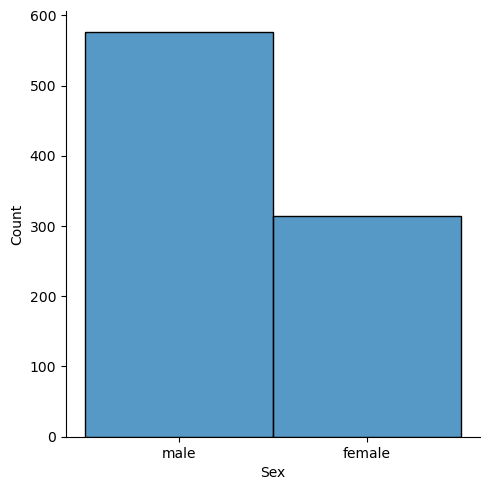

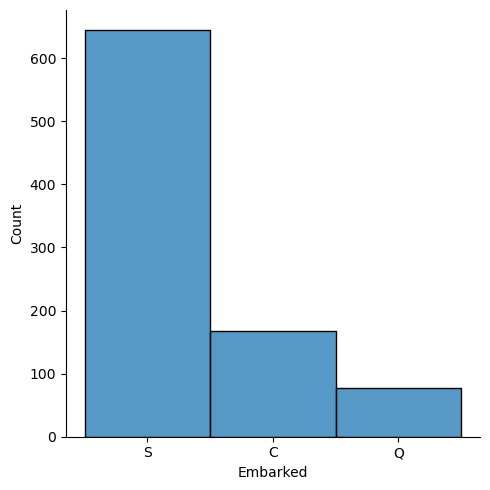

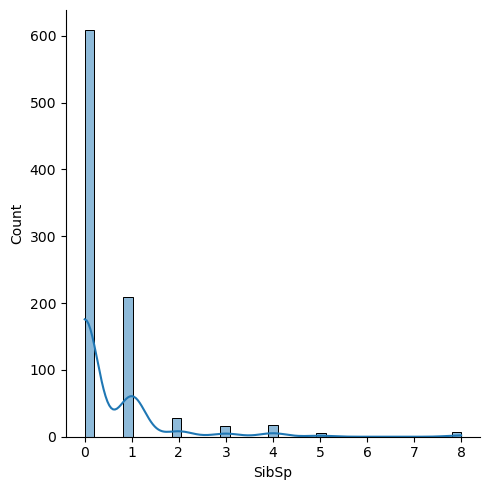

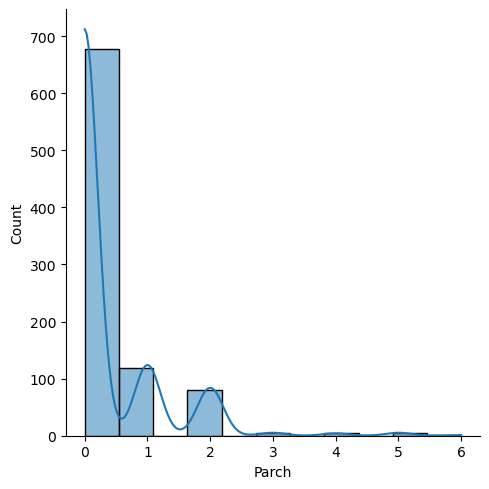

In [177]:
sns.displot(titanic['Fare'], kde=True)
sns.displot(titanic['Age'], kde=True)
sns.displot(titanic['Survived'], kde=False)
sns.displot(titanic['Pclass'], kde=False)
sns.displot(titanic['Sex'], kde=False)
sns.displot(titanic['Embarked'], kde=False)
sns.displot(titanic['SibSp'], kde=True)
sns.displot(titanic['Parch'], kde=True)

Clean of the data

In [178]:
titanic = titanic[["Survived", "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]]

titanic["Age"] = titanic["Age"].apply(pd.to_numeric, errors='coerce')
titanic["Age"] = titanic["Age"].fillna(titanic["Age"].median())

titanic.dropna(inplace=True)

titanic = pd.get_dummies(titanic, columns=["Embarked"])
titanic = pd.get_dummies(titanic, columns=["Sex"])

print(titanic.isnull().sum())
titanic.head(20)

Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
Sex_female    0
Sex_male      0
dtype: int64


,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,0,3,22.0,1,0,7.2500,False,False,True,False,True
1,1,1,38.0,1,0,71.2833,True,False,False,True,False
2,1,3,26.0,0,0,7.9250,False,False,True,True,False
3,1,1,35.0,1,0,53.1000,False,False,True,True,False
4,0,3,35.0,0,0,8.0500,False,False,True,False,True
5,0,3,28.0,0,0,8.4583,False,True,False,False,True
6,0,1,54.0,0,0,51.8625,False,False,True,False,True
7,0,3,2.0,3,1,21.0750,False,False,True,False,True
8,1,3,27.0,0,2,11.1333,False,False,True,True,False
9,1,2,14.0,1,0,30.0708,True,False,False,True,False


Split of the data

In [179]:
X = titanic.loc[:, titanic.columns != "Survived"]
Y = titanic["Survived"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

Build of the model

In [180]:
model = LogisticRegression(solver = "liblinear")
model.fit(X_train, Y_train)
Y_predict = model.predict(X_test)

print("Score : {}".format(model.score(X_test, Y_test)))

coef_df = pd.DataFrame(model.coef_, columns= X.columns)
coef_df["intercept"] = model.intercept_
coef_df

Score : 0.7892376681614349


,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,intercept
0,-0.997939,-0.029003,-0.356238,-0.053651,0.003066,0.681247,0.741858,0.317021,2.188909,-0.448783,1.740127


Performance improvement by hyper-parameter modification

In [181]:
model = LogisticRegression(solver = "lbfgs", C = 1)
model.fit(X_train, Y_train)
print("Score with solver = lbfgs and C = 1 : {}".format(model.score(X_test, Y_test)))

model = LogisticRegression(solver = "liblinear", C = 1)
model.fit(X_train, Y_train)
print("Score with solver = liblinear and C = 1 : {}".format(model.score(X_test, Y_test)))

model = LogisticRegression(solver = "liblinear", C = 10)
model.fit(X_train, Y_train)
print("Score with solver = liblinear and C = 10 : {}".format(model.score(X_test, Y_test)))

model = LogisticRegression(solver = "liblinear", C = 100)
model.fit(X_train, Y_train)
print("Score with solver = liblinear and C = 100 : {}".format(model.score(X_test, Y_test)))

model = LogisticRegression(solver = "liblinear", C = 1000)
model.fit(X_train, Y_train)
print("Score with solver = liblinear and C = 1000 : {}".format(model.score(X_test, Y_test)))

Score with solver = lbfgs and C = 1 : 0.7847533632286996
Score with solver = liblinear and C = 1 : 0.7892376681614349
Score with solver = liblinear and C = 10 : 0.7802690582959642
Score with solver = liblinear and C = 100 : 0.7757847533632287
Score with solver = liblinear and C = 1000 : 0.7757847533632287


C:\Users\nicol\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [182]:
# To conclude, one of the best model seems to be :
model = LogisticRegression(solver = "liblinear", C = 1)
model.fit(X_train, Y_train)
Y_predict = model.predict(X_test)
print("Best score : {}".format(model.score(X_test, Y_test)))

Best score : 0.7892376681614349


Evaluation of the model

Score : 0.7892376681614349
[[125  21]
 [ 26  51]]


<Axes: >

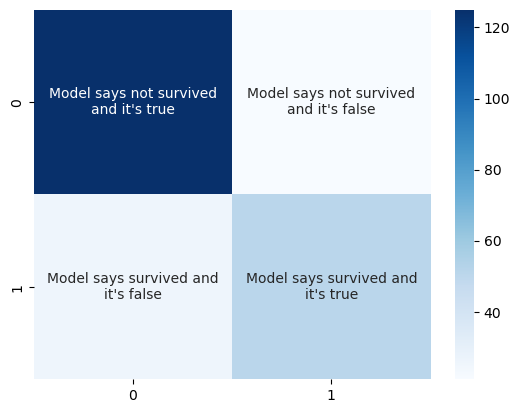

In [183]:
print("Score : {}".format(model.score(X_test, Y_test)))

cf_matrix = metrics.confusion_matrix(Y_test, Y_predict)
print(cf_matrix)

labels = [
    "Model says not survived\nand it's true", 
    "Model says not survived\nand it's false", 
    "Model says survived and\nit's false", 
    "Model says survived and\nit's true"
]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot = labels, fmt = "", cmap = "Blues")

Save the model

In [184]:
tc.save(model, "Model/Model.pt")